In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [2]:
import pandas as pd

In [3]:
# Importando a base de dados com o PIB dos estados brasileiros de 2002 a 2020
df_pib = pd.read_csv("pib_br_2002_2020_estados.csv")
df_pib

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [4]:
# Verificando os tipos de dados e se existem dados nulos
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


disposto o PIB nos estados brasileiros no ano de 2020

In [5]:
#Criando df com a copia dos dados
df_pib_2020 = df_pib.copy()
df_pib_2020 = df_pib_2020.query("ano ==2020").set_index("sigla_uf").sort_values("pib", ascending=False)[["pib"]]

df_pib_2020.head() #Resultado com valor absoluto

,pib
sigla_uf,
SP,2377638979835
RJ,753823710636
MG,682786116407
PR,487930593779
RS,470941846057


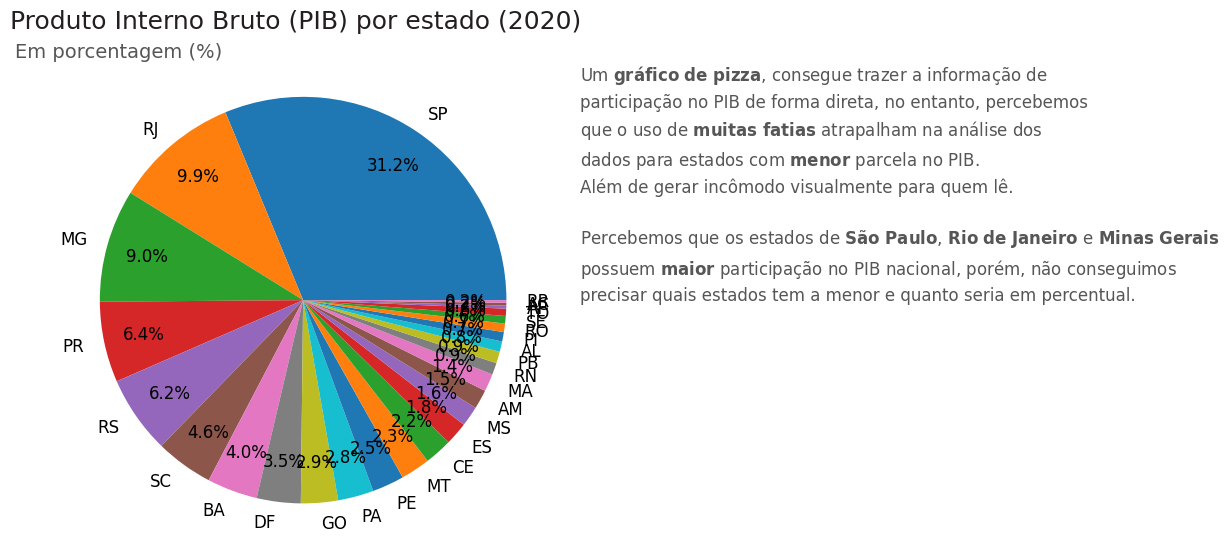

In [6]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,6))


# Gerando o gráfico de pizza
ax.pie(data = df_pib_2020, x = "pib", labels = df_pib_2020.index, autopct = "%.1f%%",
       radius = 1.1, pctdistance=0.8, textprops={"size":12})

# Personalizando o gráfico
plt.suptitle('Produto Interno Bruto (PIB) por estado (2020)', size=18, color=CINZA1)
plt.title('Em porcentagem (%)', fontsize=14, color=CINZA3, pad = 15, x = 0.1, y = 0.98 )

# Anotando uma conclusão no gráfico
ax.text(1.1, 0.5,
         'Um $\\bf{gráfico\ de\ pizza}$, consegue trazer a informação de\n'
         'participação no PIB de forma direta, no entanto, percebemos\n'
         'que o uso de $\\bf{muitas\ fatias}$ atrapalham na análise dos\n'
         'dados para estados com $\\bf{menor}$ parcela no PIB.\n'
         'Além de gerar incômodo visualmente para quem lê.\n\n'
         'Percebemos que os estados de $\\bf{São\ Paulo}$, $\\bf{Rio\ de\ Janeiro}$ e $\\bf{Minas\ Gerais}$\n'
         'possuem $\\bf{maior}$ participação no PIB nacional, porém, não conseguimos\n'
         'precisar quais estados tem a menor e quanto seria em percentual.',
         fontsize=12,
         linespacing=1.45,
         color=CINZA3, transform= ax.transAxes)

plt.show()

In [7]:
#Grafico de pizza representa um composição estatica

In [8]:
df_pib_2002 = df_pib.query("ano == 2002")[["regiao","pib"]]
df_pib_2020 = df_pib.query("ano == 2020")[["regiao","pib"]]
#groupyby agrupa dados por regiao
df_pib_2002 = df_pib_2002.groupby("regiao").sum().sort_values("pib", ascending=False)
df_pib_2020 = df_pib_2020.groupby("regiao").sum().sort_values("pib", ascending=False)

display(df_pib_2002, df_pib_2020)

,pib
regiao,
Sudeste,854309793369
Sul,241564819092
Nordeste,194847656440
Centro-Oeste,128162640832
Norte,69902366306


,pib
regiao,
Sudeste,3952694729239
Sul,1308147455374
Nordeste,1079331030689
Centro-Oeste,791250735824
Norte,478173048893


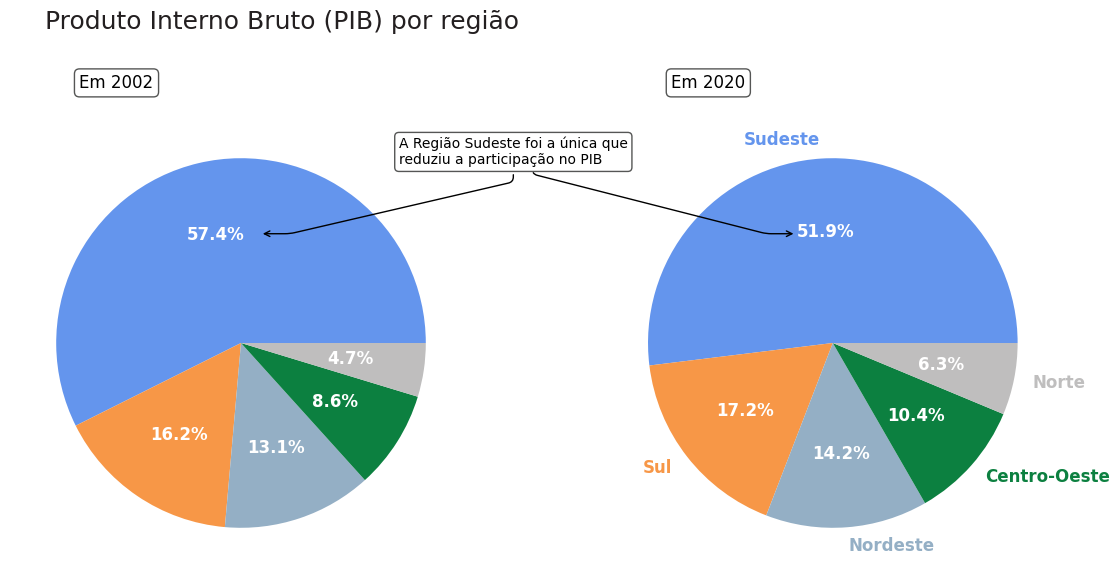

In [9]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(14,6))
# Definindo as cores do gráfico
cores = [AZUL3, LARANJA1, AZUL5 , VERDE1, CINZA5]
# Personalizando o gráfico
plt.suptitle('Produto Interno Bruto (PIB) por região', fontsize=18, color=CINZA1, ha = 'right', x = 0.5, y = 1.05)
# GRÁFICO 1 - PIB de 2002 por região
ptc, text, _ = axs[0].pie(data = df_pib_2002, x = "pib", labels = df_pib_2002.index, autopct="%.1f%%",
                          pctdistance=0.6, textprops={"size": 12, "fontweight":"bold", "color": BRANCO},
                          colors = cores)
# GRÁFICO 2 - PIB de 2020 por região
ptc, text, _ = axs[1].pie(data = df_pib_2020, x = "pib", labels = df_pib_2020.index, autopct="%.1f%%",
                          pctdistance=0.6, textprops={"size": 12, "fontweight":"bold", "color": BRANCO},
                          colors = cores)

# Título do Gráfico 1
axs[0].annotate("Em 2002", xy=(50, 350), size =12, xycoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))
# Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())
# Título do Gráfico 2
axs[1].annotate("Em 2020", xy=(50, 350), size =12, xycoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))
# Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

axs[0].annotate('A Região Sudeste foi a única que\nreduziu a participação no PIB',
            xy=(180, 245), xycoords='axes points', xytext=(280, 295), textcoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5"))
axs[1].annotate('\n\n', xy=(140, 245), xycoords='axes points', xytext=(-50, 295), textcoords='axes points',
            size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=-90,angleB=0,armA=30,armB=-30,rad=5"))

plt.show()

In [10]:
#Grafico de rosca.
#Participação do estado de Minas Gerais no PIB do Brasil no ano de 2020.

# Criando um df com os dados desejados
df_mg_2020 = df_pib.query("ano == 2020")[["sigla_uf", "pib"]]
# Renomeando todos os estados como 'Outros' e mudando da sigla MG para Minas Gerais
df_mg_2020.loc[df_mg_2020["sigla_uf"] == "MG", "sigla_uf"] = "Minas Gerais" # Na minha linha na sigla uf quero que == MG se encontrar altere a sigla uf em Minas Gerais
df_mg_2020.loc[df_mg_2020["sigla_uf"] != "Minas Gerais", "sigla_uf"] = "Outros" #A diferença que vai ser todos que não são Minas Gerais vai ser catalogado como Outros

#Agrupar os dados de "Outros"
df_mg_2020= df_mg_2020.groupby("sigla_uf").sum()
df_mg_2020

,pib
sigla_uf,
Minas Gerais,682786116407
Outros,6926810883612


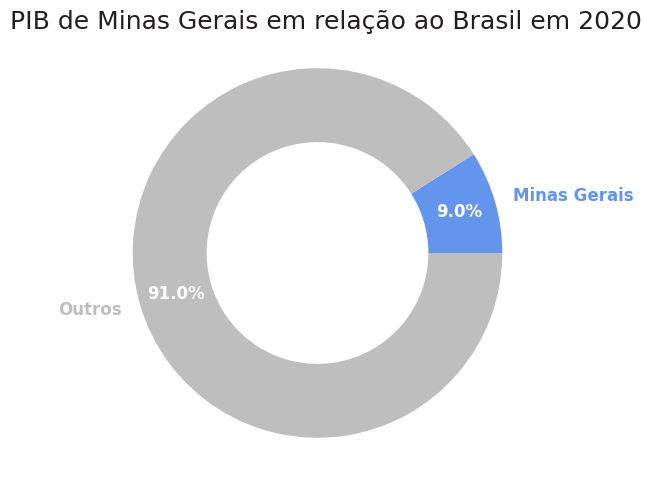

In [11]:
#Criação do grafico baseado no feitos no Projeto antecessor a esse "Comparação e distribuição de dados"
import matplotlib.pyplot as plt

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,6))
# Definindo as cores do gráfico
cores = [AZUL3, CINZA5]
# Personalizando o gráfico
plt.suptitle('PIB de Minas Gerais em relação ao Brasil em 2020', fontsize=18, color=CINZA1, ha = 'left', x = 0, y = 0.9)
# Gerando o gráfico do PIB de 2020 de Minas Gerais em relação a todo Brasil
ptc, text, _ = ax.pie(data = df_mg_2020, x="pib", labels=df_mg_2020.index, autopct = "%.1f%%",
                      startangle = 0, pctdistance = 0.8, wedgeprops=dict(width=0.4), #Diminir representação do grafico wedgeprops
                      textprops=dict(size=12, fontweight="bold", color= BRANCO),
                      colors = cores)
# Ajustando as cores das regiões relativas às fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

plt.show()


treemap é um tipo de visual muito utilizado para mostrar a composição e a hierarquia dos dados usando formas geométricas retangulares coloridas.

In [12]:
# Criando um df com os dados desejados
pib_2020 = df_pib.copy()
pib_2020 = pib_2020.query("ano == 2020")[["regiao", "sigla_uf", "pib"]]

In [13]:
# Ajustando os valores do PIB para bilhões e ordenando pelo pib
pib_2020["pib"] = (pib_2020["pib"] / 1e9).round(0).astype("int64")
pib_2020 = pib_2020.sort_values("pib", ascending= False)

In [14]:
# Gerando uma coluna para a porcentagem da representação de cada Estado no PIB de 2020
pib_2020["pib_%"] = pib_2020["pib"].div(pib_2020["pib"].sum(), axis=0)
pib_2020["pib_%"] = (pib_2020["pib_%"] * 100).round(1)

pib_2020.head()

,regiao,sigla_uf,pib,pib_%
379,Sudeste,SP,2378,31.3
360,Sudeste,RJ,754,9.9
322,Sudeste,MG,683,9.0
398,Sul,PR,488,6.4
436,Sul,RS,471,6.2


In [15]:
# Importando a biblioteca
import plotly.express as px

# Gerando o gráfico de árvore (TREEMAP) para o ano de 2020
fig = px.treemap(pib_2020, path=[px.Constant("Distribuição do PIB"), 'sigla_uf'], values='pib_%',
color='regiao', custom_data=['regiao','pib'], 
title='Distribuição do PIB nos estados brasileiros no ano de 2020 (em bilhões de reais)',
color_discrete_map={'(?)': BRANCO,'Sudeste':AZUL3, 'Sul':LARANJA1, 'Nordeste':AZUL5,
'Centro-Oeste':VERDE1, 'Norte':CINZA5})

# Ajustando o layout do gráfico
fig.update_layout(width=1400, height=600, margin = dict(t=50, l=0, r=0, b=25), font_family = 'DejaVu Sans',
                  font_size=14, font_color= CINZA2, title_font_color= CINZA1, title_font_size=24)

# Ajustando o hovertext
fig.update_traces(marker=dict(cornerradius=3), texttemplate='<b>%{label}</b>',
hovertemplate='<b>Estado:</b> %{label} <br><b>Região</b> = %{customdata[0]} <br>'                                                                                             '<b>PIB</b> = R$ %{customdata[1]} bi (%{value}%)')
fig.show()

In [16]:
#Agora trabalhando com mais do que dois dados
#distribuição do PIB do Estado da Bahia no ano de 2020, separado por impostos líquidos e valores adicionados brutos.
bahia = df_pib.query("sigla_uf == 'BA' and ano == 2020")[["pib","impostos_liquidos", "va"]]
bahia.rename(columns = {"pib":"PIB", "impostos_liquidos": "Impostos Líquidos", "va":"Valor Adicionado Bruto"}, inplace=True)
bahia

,PIB,Impostos Líquidos,Valor Adicionado Bruto
303,305320812691,37094030606,268226782074


In [17]:
bahia= bahia.melt(var_name="Indicadores", value_name="Valores") #As colunas são como linhas e os valores lao a lado
bahia

,Indicadores,Valores
0,PIB,305320812691
1,Impostos Líquidos,37094030606
2,Valor Adicionado Bruto,268226782074



#o imposto líquido precisa ser representado como um valor negativo, como queremos partir de um valor maior, o PIB, para o VA, que é menor, temos que mudar o sinal do imposto líquido.


 Ao usar melt(), estamos transformando colunas do nosso DataFrame em linhas para formar um conjunto de dados mais longo.

In [18]:
bahia.loc[bahia["Indicadores"] == "Impostos Líquidos", "Valores"]=bahia["Valores"] *-1 #Decrecimo
bahia["Valores_str"] = (bahia["Valores"]/1e9).map("R${:,.2f} Bi".format) #Valores no formato de string dividido por 1B  {:,.2f} separador do milhar é virgula, decimal é ponto e 2 casas decimais
bahia["Medidas"] = ["absolute", "relative", "total"] #Receber 3 dados total= bruto relativo= acrecimo e decrecimo e absoluto= valor inicial
bahia

,Indicadores,Valores,Valores_str,Medidas
0,PIB,305320812691,R$305.32 Bi,absolute
1,Impostos Líquidos,-37094030606,R$-37.09 Bi,relative
2,Valor Adicionado Bruto,268226782074,R$268.23 Bi,total


connector_line: linhas de conexão entre os gráficos;

totals_marker: marcador de totais, tanto dos valores absolutos quanto dos valores totais;

decreasing_marker e increasing: valores relativos. Vamos usar apenas o decreasing_marker, porque estamos trabalhando com os valores decrescentes, isto é, os decréscimos, que seriam nossos impostos líquidos.

In [19]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados
import plotly.graph_objects as go
# Gerando o gráfico de cascata
fig = go.Figure( go.Waterfall(name = "", orientation = "v", measure = bahia["Medidas"],
                             x = bahia["Indicadores"],  y = bahia["Valores"],
                             text = bahia["Valores_str"], textposition = "outside",
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             decreasing_marker = dict(color = VERMELHO1)
                             )
              )
# Personalizando o gráfico
fig.update_layout(width=1000, height=500, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Distribuição do Produto Interno Bruto (PIB) da Bahia em 2020' +
                             '<br><sup size=1 style="color:#555655">Impostos líquidos e Valores ' +
                              'Adicionados Brutos de bens e serviços (em bilhões de reais)</sup>',
                  title_pad_l = 50, plot_bgcolor= BRANCO, yaxis_range=[0,380e9], hovermode="closest")
fig.update_yaxes(showticklabels=False) ## Retirando os ticks do eixo y, removendo valores representado a esquerda do grafico.
# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")
#Colocando dado cliclavel no grafico que leva ao site do ibge
fig.add_annotation(text='Fonte dos dados: <a href="https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas">Produto Interno Bruto | IBGE</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.2, showarrow=False)

fig.show()

Ele é muito utilizado para dados financeiros e econômicos. Por exemplo, uma empresa pode querer apresentar a evolução ou oscilação das suas vendas por trimestre, ou representar o fluxo de caixa, indicando o que entra e o que sai. Desse modo, tendo um ponto inicial e um ponto final, a empresa pode saber se está gastando mais ou se está tendo mais receitas.

---
---
Evolução do PIB do Estado do Rio de Janeiro entre os anos de 2010 e 2020

In [20]:
# Selecionando os dados do RJ
anos= [x for x in range(2010,2021)] #Lembrando que é 2021 pq é sempre 1 a menos
rio = df_pib.query("sigla_uf == 'RJ' and ano == @anos")[["ano", "pib"]]
rio = rio.reset_index(drop=True)
rio

,ano,pib
0,2010,449858101109
1,2011,512767904769
2,2012,574884973130
3,2013,628226069362
4,2014,671076844311
5,2015,659138951833
6,2016,640401206447
7,2017,671605668055
8,2018,758859046865
9,2019,779927917084


Queremos representar as oscilações, ou seja, não somente o valor do PIB, mas sim o quanto ele aumentou ou diminuiu. Para isso, precisamos subtrair o valor final do valor inicial. .diff() que significa "difference" (diferença).


O uso do +; Será "relativo", "relativo", "relativo", e assim por diante. Como sabemos que são 10 anos a partir do primeiro, o valor relativo será repetido 10 vezes.


In [21]:
# Gerando uma coluna com a variação do pib e passando o valor
# do PIB inicial para a 1ª linha da variação pib
rio["variacao_pib"] = rio["pib"].diff().fillna(rio["pib"]).astype("int64")
rio["Medidas"] = ["absolute"] + ["relative"] *10 #o valor relativo será repetido 10 vezes.

rio.head()

,ano,pib,variacao_pib,Medidas
0,2010,449858101109,449858101109,absolute
1,2011,512767904769,62909803660,relative
2,2012,574884973130,62117068361,relative
3,2013,628226069362,53341096232,relative
4,2014,671076844311,42850774949,relative


In [22]:
# Gerando uma observação com a atualização da última linha com o PIB total de 2020
atualizacao = pd.Series({'ano': 'Total',
                         'pib': rio["pib"].values[-1],
                         'variacao_pib': rio["pib"].values[-1],
                         'Medidas': "total"}).to_frame().T
# Concatenando o df com a atualização e retirando a coluna pib
rio = pd.concat([rio,atualizacao], axis=0, ignore_index=True)
rio = rio.drop(columns=["pib"]) #Removendo a coluna pib

# Ajustando a formatação do PIB e renomeando colunas
rio["variacao_pib_texto"] = (rio["variacao_pib"]/1e9).map('R$ {:,.2f} Bi'.format)
rio.rename(columns = {"ano":"Ano", "variacao_pib": "Variação do PIB", "variacao_pib_texto":"Variação do PIB (em texto)"}, inplace=True)
rio

,Ano,Variação do PIB,Medidas,Variação do PIB (em texto)
0,2010,449858101109,absolute,R$ 449.86 Bi
1,2011,62909803660,relative,R$ 62.91 Bi
2,2012,62117068361,relative,R$ 62.12 Bi
3,2013,53341096232,relative,R$ 53.34 Bi
4,2014,42850774949,relative,R$ 42.85 Bi
5,2015,-11937892478,relative,R$ -11.94 Bi
6,2016,-18737745386,relative,R$ -18.74 Bi
7,2017,31204461608,relative,R$ 31.20 Bi
8,2018,87253378810,relative,R$ 87.25 Bi
9,2019,21068870219,relative,R$ 21.07 Bi


In [23]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados
import plotly.graph_objects as go
import numpy as np
# Gerando o gráfico de cascata
fig = go.Figure(
                go.Waterfall(name = "", orientation = "v", measure = rio["Medidas"],
                             y = rio["Variação do PIB"], text = rio["Variação do PIB (em texto)"],
                             textposition = "outside",
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             increasing_marker = dict(color = VERDE1),
                             decreasing_marker = dict(color = VERMELHO1)
                             )
                )
# Personalizando o gráfico
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Variação do Produto Interno Bruto (PIB) do Rio de Janeiro' +
                             '<br><sup size=1 style="color:#555655">De 2010 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor= BRANCO, yaxis_range=[0,850e9])
# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)
# Ajustando o eixo x para receber o Total
fig.update_xaxes(tickmode='array', tickvals=np.arange(0,12), ticktext=rio["Ano"])
# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.add_annotation(text="O <b>Rio de Janeiro</b> apresentou recuo no PIB<br>em pelo menos 3 anos no período:<br>2015, 2016 e 2020",
                   align="left", axref = 'x', ayref='y', x=5, y=600e9, ax=8, ay=450e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3,
                   bordercolor= CINZA3, borderwidth=1, borderpad=4)
fig.add_annotation(text="", axref = 'x', ayref='y', x=6, y=600e9, ax=8, ay=530e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3)
fig.add_annotation(text="", axref = 'x', ayref='y', x=10, y=710e9, ax=8.5, ay=530e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3)

fig.show()

#Fazendo o mesmo so que pro estado do DF

In [24]:
anos= [x for x in range(2010,2021)]
df_etd = df_pib.query("sigla_uf == 'DF' and ano == @anos")[["ano", "pib"]]
df_etd = df_etd.reset_index(drop=True)
df_etd

,ano,pib
0,2010,144174101595
1,2011,154568953955
2,2012,164101336475
3,2013,175906725532
4,2014,197432058527
5,2015,215612862838
6,2016,235540044811
7,2017,244722249337
8,2018,254817204692
9,2019,273613711477


In [25]:
df_etd["variacao_pib"] = df_etd["pib"].diff().fillna(df_etd["pib"]).astype("int64")
df_etd["Medidas"] = ["absolute"] + ["relative"] *10
df_etd.head()

,ano,pib,variacao_pib,Medidas
0,2010,144174101595,144174101595,absolute
1,2011,154568953955,10394852360,relative
2,2012,164101336475,9532382520,relative
3,2013,175906725532,11805389057,relative
4,2014,197432058527,21525332995,relative


In [26]:
atualizacao = pd.Series({'ano': 'Total',
                         'pib': df_etd["pib"].values[-1],
                         'variacao_pib': df_etd["pib"].values[-1],
                         'Medidas': "total"}).to_frame().T
df_etd = pd.concat([df_etd,atualizacao], axis=0, ignore_index=True)
df_etd = df_etd.drop(columns=["pib"])
df_etd["variacao_pib_texto"] = (df_etd["variacao_pib"]/1e9).map('R$ {:,.2f} Bi'.format)
df_etd.rename(columns = {"ano":"Ano", "variacao_pib": "Variação do PIB", "variacao_pib_texto":"Variação do PIB (em texto)"}, inplace=True)
df_etd

,Ano,Variação do PIB,Medidas,Variação do PIB (em texto)
0,2010,144174101595,absolute,R$ 144.17 Bi
1,2011,10394852360,relative,R$ 10.39 Bi
2,2012,9532382520,relative,R$ 9.53 Bi
3,2013,11805389057,relative,R$ 11.81 Bi
4,2014,21525332995,relative,R$ 21.53 Bi
5,2015,18180804311,relative,R$ 18.18 Bi
6,2016,19927181973,relative,R$ 19.93 Bi
7,2017,9182204526,relative,R$ 9.18 Bi
8,2018,10094955355,relative,R$ 10.09 Bi
9,2019,18796506785,relative,R$ 18.80 Bi


In [27]:
import plotly.graph_objects as go
import numpy as np
fig = go.Figure(
                go.Waterfall(name = "", orientation = "v", measure = df_etd["Medidas"],
                             y = df_etd["Variação do PIB"], text = df_etd["Variação do PIB (em texto)"],
                             textposition = "outside",
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             increasing_marker = dict(color = VERDE1),
                             decreasing_marker = dict(color = VERMELHO1)
                             )
                )
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Variação do Produto Interno Bruto (PIB) do Distrito Federal' +
                             '<br><sup size=1 style="color:#555655">De 2010 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor= BRANCO, yaxis_range=[0,850e9])
fig.update_yaxes(showticklabels=False)
fig.update_xaxes(tickmode='array', tickvals=np.arange(0,12), ticktext=df_etd["Ano"])
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")
fig.show()

In [28]:
#Distribuição o PIB nos últimos três quinquênios na Região Sul do Brasil divididos pelos estados
anos = [x for x in range(2010, 2021, 5)] #o 5 representa o pulo de 5 em 5 anos
# Selecionando os dados da região Sul do Brasil
anos = [x for x in range(2010, 2021, 5)]
pib_sul = df_pib.query("regiao == 'Sul' and ano == @anos")[["ano", "sigla_uf", "pib"]]
pib_sul["pib"] = (pib_sul["pib"] / 1e9).round(2)
pib_sul = pib_sul.reset_index(drop=True)
pib_sul

,ano,sigla_uf,pib
0,2010,PR,225.21
1,2015,PR,376.96
2,2020,PR,487.93
3,2010,SC,153.73
4,2015,SC,249.08
5,2020,SC,349.28
6,2010,RS,241.25
7,2015,RS,381.99
8,2020,RS,470.94


index irá dividir as linhas por ano;

columns define as colunas, que serão divididas pelos estados;

values representa o que será preenchido na tabela, que são os valores do PIB;

ggfunc realiza a soma dos PIBs em relação a cada ano e a cada estado;

normalize="index" solicita a normalização dos valores pelo índice, que no caso se refere ao 
ano, pois queremos os dados de cada ano normatizados.

In [29]:
#Criação de um novo df para os dados de  tabela cruzada
pib_sul_cross = pd.crosstab(index=pib_sul.ano, columns=pib_sul.sigla_uf, values=pib_sul.pib,aggfunc="sum", normalize="index") 
pib_sul_cross = pib_sul_cross.reset_index()

pib_sul_cross

sigla_uf,ano,PR,RS,SC
0,2010,0.363131,0.388994,0.247876
1,2015,0.373957,0.378947,0.247096
2,2020,0.372992,0.360005,0.267003


Criação dos graficos com valores absolutos e valores relativos

c:\Users\Cr0l3y\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:379: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



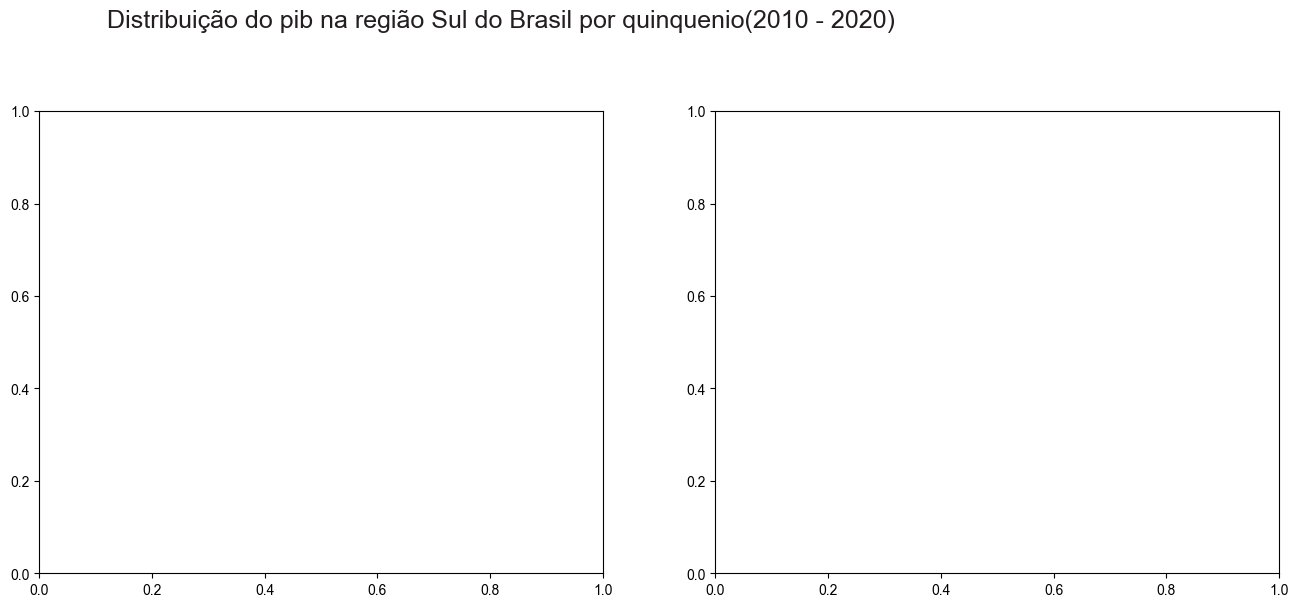

In [30]:
#Criação do grafico baseado no feitos no Projeto antecessor a esse "Comparação e distribuição de dados"
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.set_theme(style="white")
cores = [AZUL6, VERDE3, VERMELHO2]

fig.suptitle('Distribuição do pib na região Sul do Brasil por quinquenio(2010 - 2020)', fontsize=18, color=CINZA1, ha = 'right', x = 0.66, y = 1.05)
sns.barplot(data = pib_sul, x = "ano", y = "pib", hue = "sigla_uf", hue_order = ["PR", "RS", "SC"], ax = axs[0], palette = cores)#ordem de exibição com o parâmetro hue_order
axs[0].set_title('Em bilhoes de reais\n', color = CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].xaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].yaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].set_frame_on(False)

axs[0].legend().remove()
axs[0].yaxis.grid(linestyle='--', linewidth=1)

#Grafico 2
pib_sul_cross.plot(x = "ano", kind="bar", stacked = True, color = cores, ax = axs[1])
axs[1].set_title('Em porcentagem\n', color = CINZA3, loc="left")
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].xaxis.set_tick_params(labelsize=14, color = CINZA2, labelrotation=0)
axs[1].set_frame_on(False)

# Adicionar a legenda entre os dois gráficos
axs[1].legend(bbox_to_anchor=(-0.005, 1), title='Estado', title_fontsize  = 12, fontsize = 12)

# Adicionando os valores dentro da coluna
for container in axs[1].containers:
    labels = [f'{valor.get_height()*100:.0f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 11, color = CINZA3, fontweight = "bold")

plt.show()


In [31]:
# Selecionando os dados desejados
df_va_separado = df_pib.query("ano == 2020")[["regiao", "va_servicos", "va_industria", "va_adespss", "va_agropecuaria"]]
df_va_separado = df_va_separado.reset_index(drop=True)
df_va_separado.head()

,regiao,va_servicos,va_industria,va_adespss,va_agropecuaria
0,Norte,19060688172,8285675423,12000339417,6891411669
1,Norte,6590543336,1191345379,6031050521,983531817
2,Norte,34795836262,35839810630,20210620577,5114449144
3,Norte,5278754961,1706511471,6538065265,1000907462
4,Norte,56395092425,84173852308,37614037902,19730656823


In [32]:
# Agrupando os dados por região
df_va_separado = df_va_separado.groupby("regiao").agg("sum")
#normalização a parti do total por cada regiao
# Normalizando os dados de cada região
df_va_separado = df_va_separado.div(df_va_separado.sum(axis=1), axis=0)
df_va_separado = df_va_separado.sort_values(by="va_servicos", axis=0)

df_va_separado

,va_servicos,va_industria,va_adespss,va_agropecuaria
regiao,,,,
Norte,0.338521,0.323217,0.239485,0.098777
Centro-Oeste,0.435471,0.153645,0.266185,0.144699
Nordeste,0.459790,0.191011,0.260121,0.089078
Sul,0.508060,0.252751,0.139648,0.099541
Sudeste,0.610871,0.228032,0.133536,0.027561


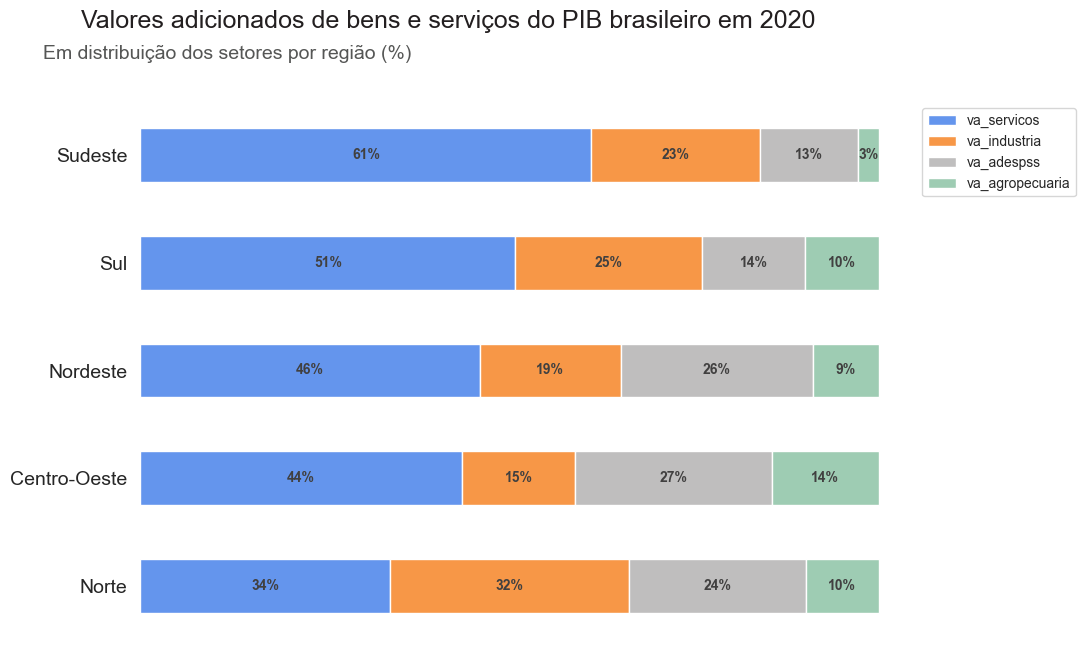

In [33]:
# Gerando a função para criar o gráfico de barras empilhadas

def grafico_va():
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots(figsize=(10,7))
  cores = [AZUL3, LARANJA1, CINZA5, VERDE3]
  df_va_separado.plot(kind="barh", stacked=True, color = cores, ax=ax)

  plt.suptitle('Valores adicionados de bens e serviços do PIB brasileiro em 2020', size=18, color=CINZA1, ha = 'right', x = 0.8, y = 1.01)
  plt.title('Em distribuição dos setores por região (%)\n', fontsize=14, color=CINZA3, pad = 15, ha = "right", x = 0.35)
  ax.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes, fontsize = 10, loc='upper left', )
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=14, color = CINZA2)
  ax.set_frame_on(False)
  # Valores das barras
  for container in ax.containers:
      labels = [f'{valor.get_width()*100:.0f}%' for valor in container]
      ax.bar_label(container, label_type='center', labels = labels, size = 10, color = CINZA2, fontweight='bold')
  return ax, cores

ax, cores = grafico_va()

In [34]:
#Criação do grafico baseado no feitos no Projeto antecessor a esse "Comparação e distribuição de dados" - grafic_comp_distr

from matplotlib import transforms
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas
    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, 
                                       units='dots')
        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

barra inclinada, \, ao final de cada palavra que tem uma separação. O motivo é que o MathText - utilizado para deixar um número ou palavra em negrito - não trabalha bem com os espaços. Portanto, é preciso inserir uma barra para espaçar valores.

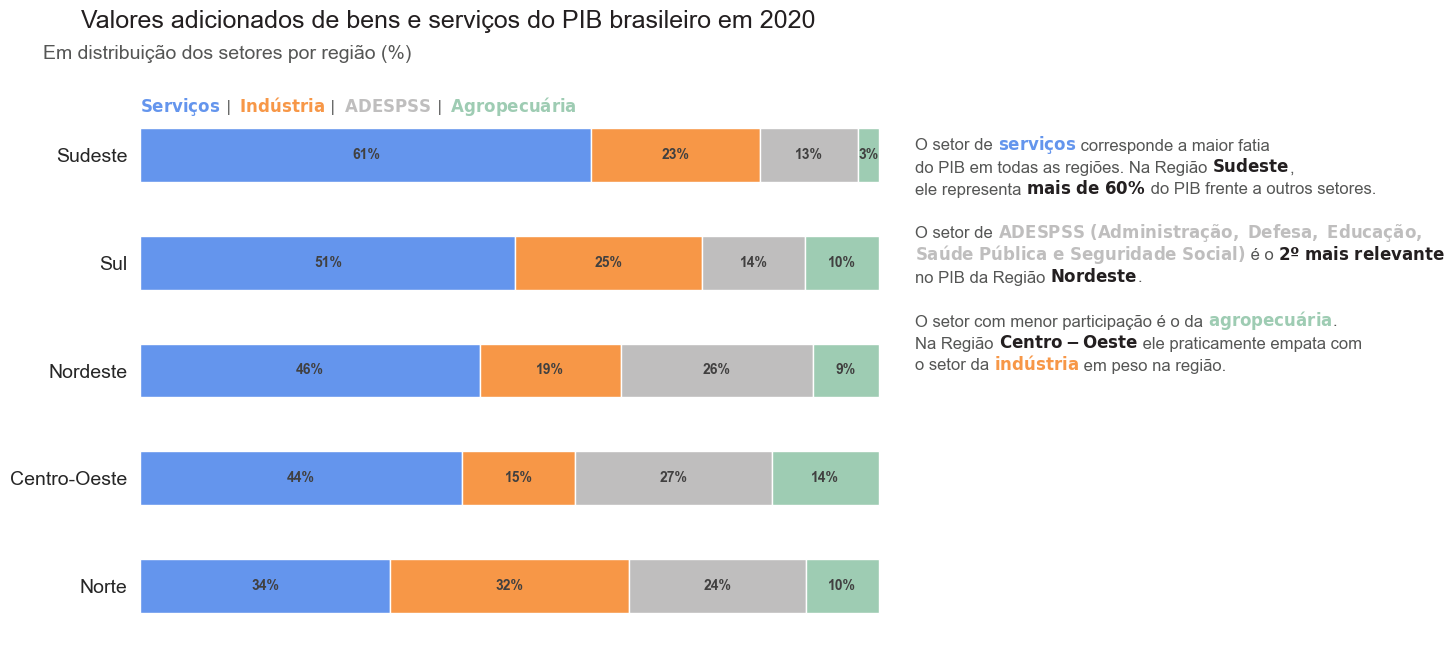

In [35]:
#Alteração legenda, e cada nome relacionada a cor do grafico
ax, cores = grafico_va()
# legenda das barras
ax.legend().remove()    # remover legenda padrão da visualização
texto_colorido(0, 4.4, '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$ || | || $\\bf{Agropecuária}$', # || divisao do texto  /   escrever em negrito $\\bf{Serviços}$
               cores = [[cores[0], CINZA3, cores[1], CINZA3, cores[2], CINZA3, cores[3]]], ax=ax, fontsize=12)

# Anotando uma conclusão no gráfico
texto_colorido(
    1.05, 2,                                                             # coordenadas
    'O setor de ||$\\bf{serviços}$|| corresponde a maior fatia\n'        # texto
    'do PIB em todas as regiões. Na Região ||$\\bf{Sudeste}$||,\n'
    'ele representa ||$\\bf{mais\ de\ 60\%}$|| do PIB frente a outros setores.\n'
    '\n'
    'O setor de ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
    '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$|| é o ||$\\bf{2º\ mais\ relevante}$||\n'
    'no PIB da Região ||$\\bf{Nordeste}$||.\n'
    '\n'
    'O setor com menor participação é o da ||$\\bf{agropecuária}$||.\n'
    'Na Região ||$\\bf{Centro-Oeste}$|| ele praticamente empata com\n'
    'o setor da ||$\\bf{indústria}$|| em peso na região.',
    [[CINZA3, AZUL3, CINZA3],         # linha 1                          # cores
     [CINZA3, CINZA1, CINZA3],        # linha 2
     [CINZA3, CINZA1, CINZA3],        # linha 3
     [CINZA3],                        # linha 4
     [CINZA3, CINZA5],                # linha 5
     [CINZA5, CINZA3, CINZA1],        # linha 6
     [CINZA3, CINZA1, CINZA3],        # linha 7
     [CINZA3],                        # linha 8
     [CINZA3, VERDE3, CINZA3],        # linha 9
     [CINZA3, CINZA1, CINZA3],        # linha 10
     [CINZA3, LARANJA1, CINZA3]       # linha 11
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=12)



In [36]:
# Selecionando os dados desejados
df_agro = df_pib.copy()
df_agro = df_agro[["regiao", "ano", "va_agropecuaria"]] # Pegando as colunas "regiao", "ano", "va_agropecuaria"

# Agrupando os dados por região
df_agro = pd.crosstab(index = df_agro.ano, columns = df_agro.regiao,
                      values = df_agro.va_agropecuaria, aggfunc="sum")
df_agro = (df_agro / 1e9).round(2) #Dividido por 1 Bi

df_agro.head()

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
ano,,,,,
2002,12.98,17.04,6.40,22.57,22.53
2003,18.70,20.98,8.14,25.71,32.42
2004,20.98,22.44,8.18,28.27,31.05
2005,17.04,22.03,8.53,28.99,24.37
2006,12.15,23.42,8.91,34.44,26.37


Text(2020, 454.62, '434.62 Bi')

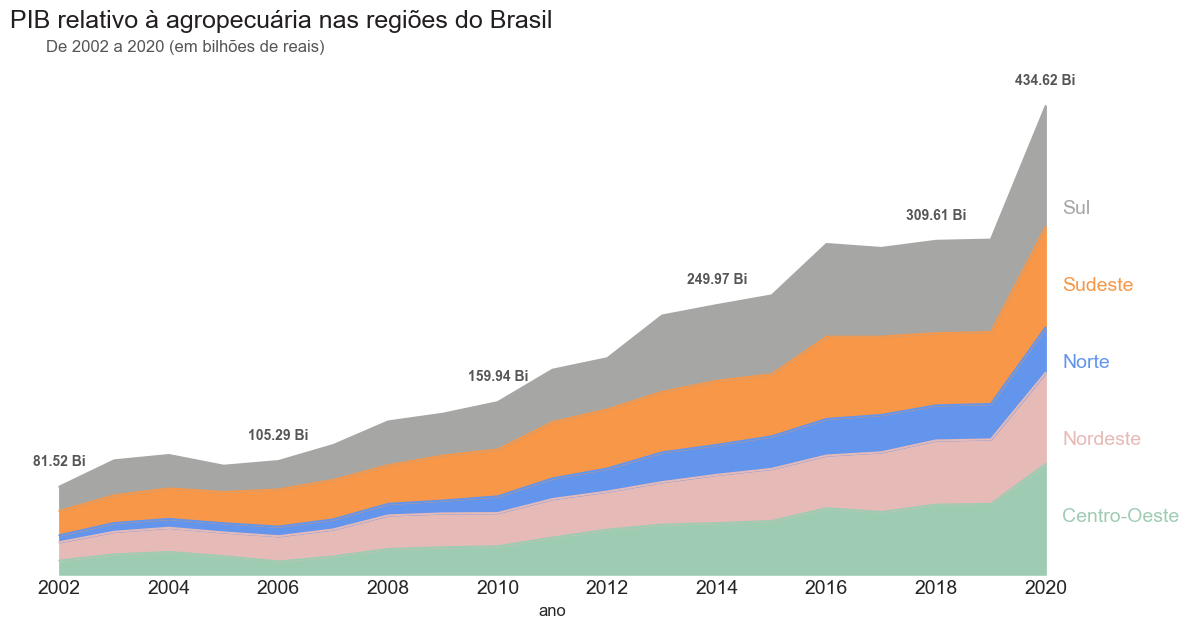

In [37]:
#Gerando um grafico de linhas

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,7))
cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

df_agro.plot(kind="area", stacked=True, color = cores, ax = ax, xticks = range(2002, 2021, 2)) #pular de 2 em 2 anos. Isso resulta em: xticks = range(2002, 2021, 2)

## Personalizando o gráfico
ax.set_title('PIB relativo à agropecuária nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left')
ax.text(0.29, 0.98, "De 2002 a 2020 (em bilhões de reais)", transform=ax.transAxes, color= CINZA3, fontsize=12, ha='right', va='center')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=14, color = CINZA2)
ax.legend().remove()
ax.set_frame_on(False)

## Anotando os nomes das regiões
reg = list(reversed(df_agro.columns)) #reg irá receber as regiões através de uma lista reversa do dfa_agro.columns, Oo nomes das colunas são os nomes das regiões.
cor = list(reversed(cores)) #Invertemos os dados das cores para que sigam os valores das regiões
for i in range(len(reg)):
  ax.text(0.97, (0.67 - i/7), f'{reg[i]}', fontsize=14, color = cor[i], transform=ax.transAxes) #Em vez de passar os valores como estão em x (os anos) e em y (os valores em milhões), passamos a transformação para o eixo que vai de 0 a 1.

# Descrevendo o limite mínimo e máximo do eixo y e escondendo o eixo
plt.ylim(0, 500)
ax.get_yaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

# Destacando os valores de 4 em 4 anos e no ano de 2020
agregado_ano = list(df_agro.sum(axis=1).round(2))
for i in range(0, len(df_agro.index), 4):
  ax.text(x = df_agro.index[i], y = agregado_ano[i] + 20, s = f"{agregado_ano[i]} Bi", color = CINZA3, weight = "bold", fontsize = 10, ha="center")
ax.text(x = df_agro.index[-1], y = agregado_ano[-1] + 20, s = f"{agregado_ano[-1]} Bi", color = CINZA3, weight = "bold", fontsize = 10, ha="center")


In [38]:
df_agro_slope = df_pib.query("ano == [2002, 2020]")[["regiao",  "ano", "va_agropecuaria"]]
df_agro_slope = pd.crosstab(index = df_agro_slope.ano, columns = df_agro_slope.regiao,
                      values = df_agro_slope.va_agropecuaria, aggfunc="sum", normalize="index")
df_agro_slope = (df_agro_slope * 100).round(1)
df_agro_slope.head()

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
ano,,,,,
2002,15.9,20.9,7.9,27.7,27.6
2020,23.6,19.4,9.7,21.5,25.8


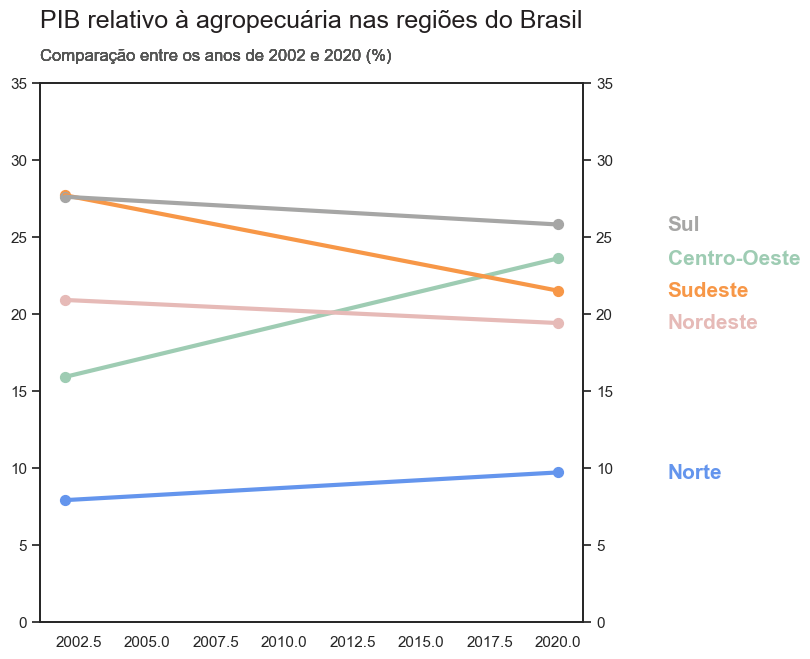

In [45]:
## Gerando a função para criar o gráfico de inclinação, precisa ajusata ja qunao vamos usar searborn e vamos criar um grafico do 0, espelhar o Y
def grafico_slope_agro():
  import matplotlib.pyplot as plt
  fig, ax1 = plt.subplots(figsize=(7,7))
  cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]
  ax2 = ax1.twinx()
  ax1.set_ylim([0,35])
  ax2.set_ylim([0,35])
  for i in range(5):
# Adicionando o ponto inicial e final
    ax1.scatter(x = df_agro_slope.index, y = df_agro_slope.iloc[:,i], color = cores[i], s = 50)
# Adicionando a inclinação
    ax1.plot(df_agro_slope.index, df_agro_slope.iloc[:,i], color = cores[i], lw = 3)
# Adicionando as regiões no label
    ax1.text(x = 2024, y = df_agro_slope.iloc[-1,i], s = df_agro_slope.columns[i],
                fontsize=15, fontweight = 'bold', linespacing=1.5, color=cores[i], va='center')
## Personalizando o gráfico
    ax1.set_title('PIB relativo à agropecuária nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', pad = 40)
    ax1.text(0, 1.05, "Comparação entre os anos de 2002 e 2020 (%)", transform=ax1.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')

  return ax1, ax2, cores
ax1, ax2, cores = grafico_slope_agro()

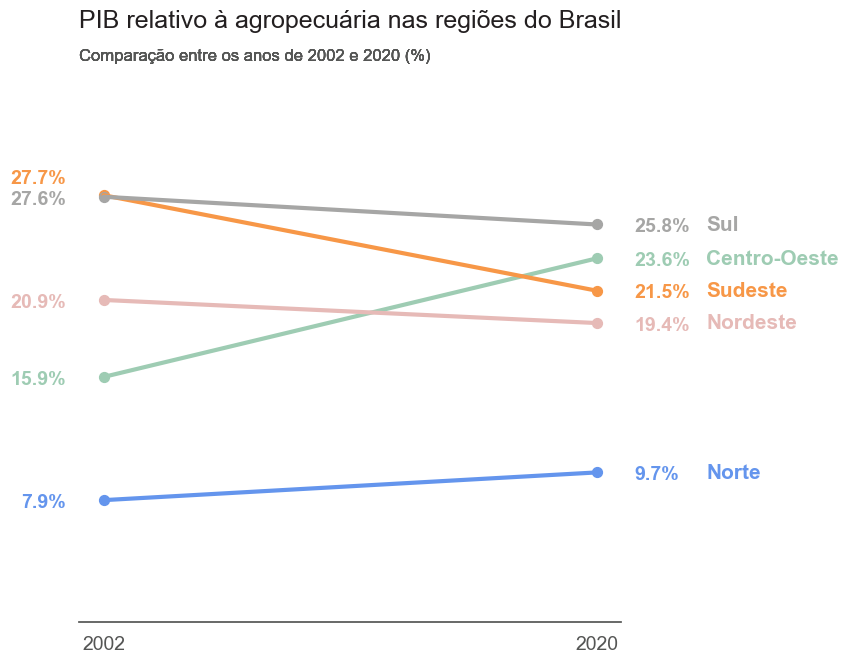

In [49]:
ax1, ax2, cores = grafico_slope_agro()
# Retirando os ticks do eixo y de ambos os lados e as bordas exceto a da base
ax1.tick_params(left = False)
ax1.spines[["top", "left", "right"]].set_visible(False)
ax2.tick_params(right = False)
ax2.set_frame_on(False)
# Ajustando as propriedades do eixo y da esquerda
plt.setp(ax1, xticks=[2002, 2020], xticklabels = ["2002", "2020"], #setp alterar parametro de visualização
         yticks = df_agro_slope.iloc[0,:],
         yticklabels = [f'{str(valor)}%' if i!= 3 else f'{str(valor)}%\n\n' for i, valor in enumerate(df_agro_slope.iloc[0,:])] #"\n\n" nós "pulamos de linha" duas vezes, fazendo com que o valor seja o mesmo, mas exibido um pouco mais acima.
         )
# Ajustando as propriedades do eixo y da direita
plt.setp(ax2, yticks = df_agro_slope.iloc[1,:],
         yticklabels = [f'{str(valor)}%' for i, valor in enumerate(df_agro_slope.iloc[1,:])])
# Ajustando propriedades dos dois eixos y
for ax in (ax1, ax2):
  for i, item in enumerate(ax.get_yticklabels()):
    item.set_fontsize(14)
    item.set_fontweight('bold')
    item.set_color(cores[i])

# Ajustando propriedades do eixo x
ax1.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA3)
ax1.spines['bottom'].set_color(CINZA3)

plt.show()